In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# reading the data
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")
data = pd.concat([train_data, test_data], axis=0, join="inner")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


The dataset contains 40,000 movie reviews from IMDB and has two columns. First one being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

# Visualizing the distribution of the data

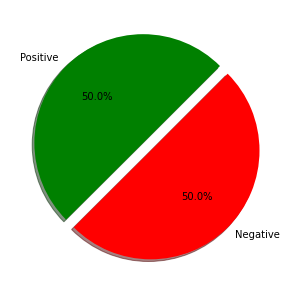

In [3]:
# visualzing the distribution
fig = plt.figure(figsize = (5,5))
colors = ["green",'red']
pos = data[data['label'] == 1]
neg = data[data['label'] == 0]
ck = [pos['label'].count(), neg['label'].count()]
legpie = plt.pie(ck, labels = ["Positive", "Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode = (0, 0.1))

#Preprocessing - 


In [4]:
# removing tags from text and replacing them with an empty string
import re
def preprocessing(text_data):
             text = re.sub('<[^>]*>', '', text_data)
             emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text_data)
             text = re.sub('[\W]+', ' ', text_data.lower()) +\
                ' '.join(emojis).replace('-','')
             return text

data['text'] = data['text'].apply(preprocessing)

In [5]:
# using PorterStemmer to simplify the data 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def tokenizer(text):
        return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [6]:
# removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words - 


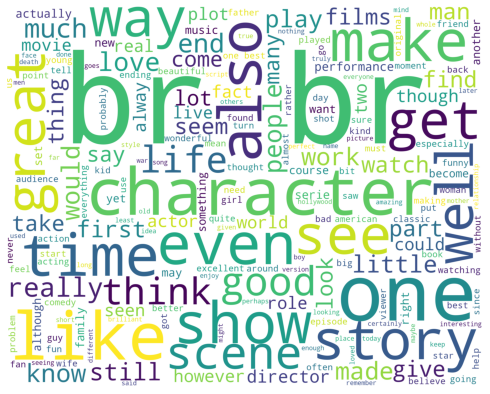

Negative words - 


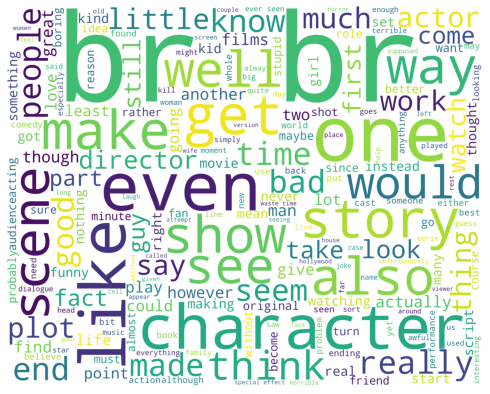

In [7]:
# visualizing negative and postive words using a wordcloud
from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']

def wordcloud_draw(data, color='white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words - ")
wordcloud_draw(positivedata)
print("Negative words - ")
wordcloud_draw(negdata)

#Model 

In [8]:
# converting raw document into feature matrix using a TF-IDF Vertorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True, norm='l2', smooth_idf=True)
y = data.label.values
X = tfidf.fit_transform(data.text)

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, shuffle=False)

In [10]:
# training a logistic regression model 
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
clf = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# computing model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.8min finished


Accuracy: 0.8998518518518519
